In [1]:
import numpy as np
#data
np.random.seed(seed=1)
N=200#サンプルサイズ
K=3#分布の数
T=np.zeros((N,3),dtype=np.uint8)
X=np.zeros((N,2))
X0_min,X0_max=-3,3
X1_min,X1_max=-3,3
prm_mu=np.array([[-0.5,-0.5],[0.5,1.0],[1,-0.5]])
prm_sig=np.array([[0.7,0.7],[0.8,0.3],[0.3,0.8]])
prm_pi=np.array([0.4,0.8,1])
for n in range(N):
    r=np.random.rand()
    for k in range(K):
        if r<prm_pi[k]:
            T[n,k]=1
            break
    for k in range(2):
        X[n,k]=np.random.randn()*prm_sig[T[n,:]==1,k]+prm_mu[T[n,:]==1,k]
        print(X[n,k])


-0.14173827091891422
0.8653366576837682
-0.8697202265844189
-1.2510780355093192
-2.154428023346008
0.29474174353009697
0.7552312768456788
0.925188887356777
-1.1019346247138375
0.7408253405557994
0.24206623678919398
0.8847836935994753
1.2189926789241534
-0.2016049687496675
0.9482715377348693
-1.2022867343370973
1.5741461162707133
-0.23536229627768696
0.13111350441495684
-0.14825396276869224
-1.0950366640352582
0.17257400286501723
0.4016878195850815
0.7192691697222794
0.688588370637155
-1.3075838614202528
-0.9810208900837196
-1.0916439490491037
0.5825303971519754
0.8134999456788625
0.6618615239769092
0.01943091240413486
0.684278289301216
-1.0235676190307847
0.5406462038208232
0.808901306029194
1.04670738447575
1.00686579244431
0.740136255964662
0.8943250460519444
0.3738098511242446
-1.0303718989972075
0.728469860203407
1.2655423492812183
-0.5332501622387558
0.7455268254858054
1.146555443961249
-0.5604573704168446
-0.20438143699962452
1.0834386537125327
1.6556726219599485
-1.6171970683905

In [2]:
#訓練データとテストデータ
TrainingRatio=0.5
N_training=int(N*TrainingRatio)
X_train=X[:N_training,:]
X_test=X[N_training:,:]
T_train=T[:N_training,:]
T_test=T[N_training:,:]
#save data
np.savez(
    "Ch7_data.npz",
    X_train=X_train,T_train=T_train,X_test=X_test,T_test=T_test,
    X0_min=X0_min,X0_max=X0_max,X1_min=X1_min,X1_max=X1_max,
)

In [3]:
print(T)

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 

In [4]:
print(X)

[[-1.41738271e-01  8.65336658e-01]
 [-8.69720227e-01 -1.25107804e+00]
 [-2.15442802e+00  2.94741744e-01]
 [ 7.55231277e-01  9.25188887e-01]
 [-1.10193462e+00  7.40825341e-01]
 [ 2.42066237e-01  8.84783694e-01]
 [ 1.21899268e+00 -2.01604969e-01]
 [ 9.48271538e-01 -1.20228673e+00]
 [ 1.57414612e+00 -2.35362296e-01]
 [ 1.31113504e-01 -1.48253963e-01]
 [-1.09503666e+00  1.72574003e-01]
 [ 4.01687820e-01  7.19269170e-01]
 [ 6.88588371e-01 -1.30758386e+00]
 [-9.81020890e-01 -1.09164395e+00]
 [ 5.82530397e-01  8.13499946e-01]
 [ 6.61861524e-01  1.94309124e-02]
 [ 6.84278289e-01 -1.02356762e+00]
 [ 5.40646204e-01  8.08901306e-01]
 [ 1.04670738e+00  1.00686579e+00]
 [ 7.40136256e-01  8.94325046e-01]
 [ 3.73809851e-01 -1.03037190e+00]
 [ 7.28469860e-01  1.26554235e+00]
 [-5.33250162e-01  7.45526825e-01]
 [ 1.14655544e+00 -5.60457370e-01]
 [-2.04381437e-01  1.08343865e+00]
 [ 1.65567262e+00 -1.61719707e+00]
 [ 7.60045942e-01  9.36426123e-01]
 [ 7.52507958e-01  3.93339635e-01]
 [ 1.21527695e+00 -7

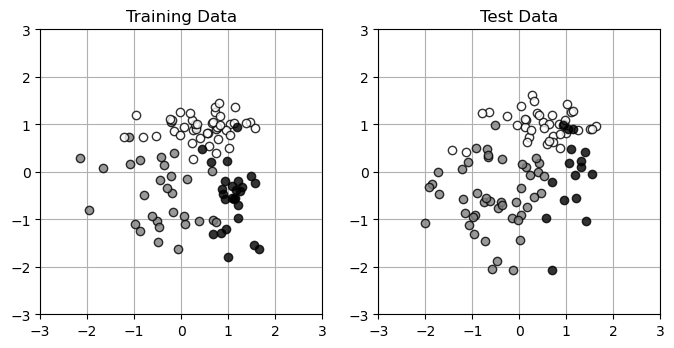

In [5]:
import matplotlib.pyplot as plt
#data
def show_data(x,t):
    K=t.shape[1]
    col=["gray","white","black"]
    for k in range(K):
        plt.plot(
            x[t[:,k]==1,0],x[t[:,k]==1,1],col[k],
            marker="o",linestyle="None",
            markeredgecolor="black",alpha=0.8,
        )
    plt.xlim(X0_min,X0_max)
    plt.ylim(X1_min,X1_max)
#main
plt.figure(figsize=(8,3.7))
plt.subplot(1,2,1)
show_data(X_train,T_train)
plt.title("Training Data")
plt.grid()
#test
plt.subplot(1,2,2)
show_data(X_test,T_test)
plt.title("Test Data")
plt.grid()
plt.show()

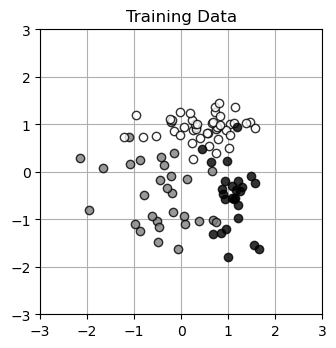

In [6]:
import matplotlib.pyplot as plt
#data
def show_data(x,t):
    K=t.shape[1]
    col=["gray","white","black"]
    plt.plot(x[t[:,0]==1,0],x[t[:,0]==1,1],col[0],
             x[t[:,1]==1,0],x[t[:,1]==1,1],col[1],
             x[t[:,2]==1,0],x[t[:,2]==1,1],col[2],
             marker="o",linestyle="None",markeredgecolor="black",alpha=0.8,
    )
    plt.xlim(X0_min,X0_max)
    plt.ylim(X1_min,X1_max)
#main
plt.figure(figsize=(8,3.7))
plt.subplot(1,2,1)
show_data(X_train,T_train)
plt.title("Training Data")
plt.grid()

In [7]:
print(X)

[[-1.41738271e-01  8.65336658e-01]
 [-8.69720227e-01 -1.25107804e+00]
 [-2.15442802e+00  2.94741744e-01]
 [ 7.55231277e-01  9.25188887e-01]
 [-1.10193462e+00  7.40825341e-01]
 [ 2.42066237e-01  8.84783694e-01]
 [ 1.21899268e+00 -2.01604969e-01]
 [ 9.48271538e-01 -1.20228673e+00]
 [ 1.57414612e+00 -2.35362296e-01]
 [ 1.31113504e-01 -1.48253963e-01]
 [-1.09503666e+00  1.72574003e-01]
 [ 4.01687820e-01  7.19269170e-01]
 [ 6.88588371e-01 -1.30758386e+00]
 [-9.81020890e-01 -1.09164395e+00]
 [ 5.82530397e-01  8.13499946e-01]
 [ 6.61861524e-01  1.94309124e-02]
 [ 6.84278289e-01 -1.02356762e+00]
 [ 5.40646204e-01  8.08901306e-01]
 [ 1.04670738e+00  1.00686579e+00]
 [ 7.40136256e-01  8.94325046e-01]
 [ 3.73809851e-01 -1.03037190e+00]
 [ 7.28469860e-01  1.26554235e+00]
 [-5.33250162e-01  7.45526825e-01]
 [ 1.14655544e+00 -5.60457370e-01]
 [-2.04381437e-01  1.08343865e+00]
 [ 1.65567262e+00 -1.61719707e+00]
 [ 7.60045942e-01  9.36426123e-01]
 [ 7.52507958e-01  3.93339635e-01]
 [ 1.21527695e+00 -7

In [8]:
#sigmoid function
def sigmoid(a):
    y=1/(1+np.exp(-a))
    return y
#network
def FNN(wv,M,K,x):
    N,D=x.shape#入力次元
    w=wv[:M*(D+1)]#中間層のニューロンの重み（ニューロンは入力値？）
    w=w.reshape(M,(D+1))
    v=wv[M*(D+1):]#出力層のニューロンの重み
    v=v.reshape((K,M+1))
    b=np.zeros((N,M+1))#中間層ニューロンの入力総和
    z=np.zeros((N,M+1))#中間層ニューロンの出力
    a=np.zeros((N,K))#出力層ニューロンの入力総和
    y=np.zeros((N,K))#出力層ニューロンの出力
    for n in range(N):
        for m in range(M):
            x_add1=np.r_[x[n,:],1]
            b[n,m]=w[m,:]@x_add1#xはすべてぶち込むわけではなくmに合わせた行数のxの要素を入れる
            z[n,m]=sigmoid(b[n,m])
        z[n,M]=1#ダミーニューロン
        u=0
        for k in range(K):
            a[n,k]=v[k,:]@z[n,:]#行列の積という名前のベクトルの内積？
            u=u+np.exp(a[n,k])
        for k in range(K):
            y[n,k]=np.exp(a[n,k])/u
    return y,a,z,b
#test
wv=np.ones(15)
M,K=2,3
y,a,z,b=FNN(wv,M,K,X_train[:2,:])
print("y=\n",np.round(y,6))
print("a=\n",np.round(a,6))
print("z=\n",np.round(z,6))
print("b=\n",np.round(b,6))
        

y=
 [[0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]]
a=
 [[2.697184 2.697184 2.697184]
 [1.491726 1.491726 1.491726]]
z=
 [[0.848592 0.848592 1.      ]
 [0.245863 0.245863 1.      ]]
b=
 [[ 1.723598  1.723598  0.      ]
 [-1.120798 -1.120798  0.      ]]


In [9]:
#平均交差エントロピー誤差
#最尤法の逆
def cee_FNN(wv,M,K,x,t):
    N,D=x.shape
    y,a,z,b=FNN(wv,M,K,x)
    cee=-(t.reshape(-1)@np.log(y.reshape(-1)))/N
    return cee
#test
wv=np.ones(15)
M,K=2,3
cee=cee_FNN(wv,M,K,X_train[:2,:],T_train[:2,:])
print(f"cee={cee:.6}")

cee=1.09861
